In [1]:
import os.path
import sys

import os

# Récupère le chemin d'accès parent de sys.path[0]
parent_dir = os.path.dirname(sys.path[0])


sys.path.append(os.path.abspath(parent_dir))
import importlib
import algorithmes
importlib.reload(algorithmes)
from algorithmes import *
import random


In [40]:
nombre_client=20

In [41]:
import random

# Définition de la fonction de voisinage
def voisinage(solution_route):

    solution = list(itertools.chain.from_iterable(solution_route))
    voisin = solution.copy()
    i = random.randint(0, len(solution) - 1)  # Sélection d'un élément au hasard
    j = random.randint(0, len(solution) - 1)  # Sélection d'un autre élément au hasard
    voisin[i], voisin[j] = voisin[j], voisin[i]  # Échange des deux éléments

    return get_route_version2(voisin,time_window, Q)

# Définition de l'algorithme Tabou
def tabou(liste_initiale, taille_tabou, max_iterations,n_voisin):
    
     
    meilleure_solution = liste_initiale # la meilleure solution trouvée jusqu'à présent
    meilleure_valeur = cout(meilleure_solution) # la valeur de la meilleure solution
    history_sol=[meilleure_solution]
    liste_tabou = [] # la liste tabou pour stocker les solutions interdites
    history = [meilleure_valeur] # tableau qui stocke la meilleure valeur de chaque itération

    
    for i in range(max_iterations):
        
        # recherche du meilleur voisin parmi les n_voisin voisins générés
        for i in range(n_voisin):
            voisin = voisinage(meilleure_solution)
            
            # Si le voisin est dans la liste tabou, on en génère un autre
            while voisin in liste_tabou:
                voisin = voisinage(meilleure_solution)
                

            if i==0:
                # si c'est le premier voisin, on initialise la meilleure valeur avec celle-ci
                valeur_meilleur_voisin = cout(voisin)
                meilleur_voisin = voisin
                 
            else:
                # sinon, on compare avec la valeur du voisin précédent
                s = cout(voisin)
                if s<valeur_meilleur_voisin:
                    meilleur_voisin = voisin
                    valeur_meilleur_voisin = s
            
        # on passe au meilleur voisin trouvé de la solution courante
        meilleure_solution = meilleur_voisin
        meilleure_valeur = valeur_meilleur_voisin
            
        # ajout de la solution courante à la liste tabou
        liste_tabou.append(meilleure_solution)
        
        # Si la taille de la liste tabou dépasse la taille maximale autorisée, on supprime le premier élément
        if len(liste_tabou) > taille_tabou:
            liste_tabou.pop(0)
            
        # ajout de la meilleure valeur à l'historique
        history.append(meilleure_valeur)
        history_sol.append(meilleure_solution)

    # retourne la meilleure solution trouvée, sa valeur et l'historique des meilleures valeurs
    indice = history.index(min(history))
    return history_sol[indice] , history[indice] , history



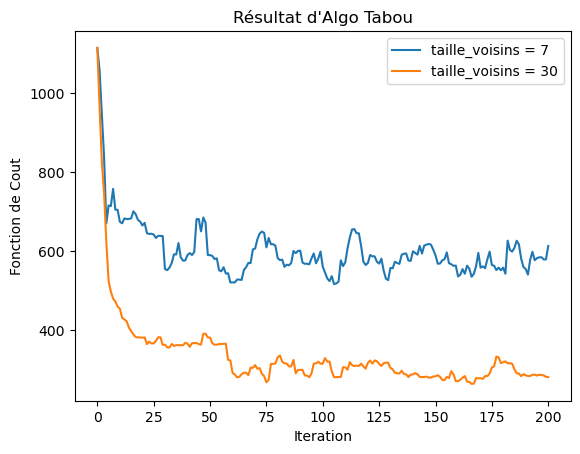

In [48]:
# Exemple d'utilisation
list_client_initial = get_route_version2([i for i in range(nombre_client)],time_window, Q) 
taille_tabou = 20
max_iterations = 200
taille_voisin = 10

meilleure_solution, meilleure_valeur , history_1 = tabou(list_client_initial, taille_tabou, max_iterations,7)
meilleure_solution, meilleure_valeur , history_2 = tabou(list_client_initial, taille_tabou, max_iterations,30)
 

 
plt.plot(history_1,label = 'taille_voisins = 7')
plt.plot(history_2,label = 'taille_voisins = 30')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Fonction de Cout')
plt.title("Résultat d'Algo Tabou")
plt.savefig('Résultats/Algo_taille_voisns_Tabou')

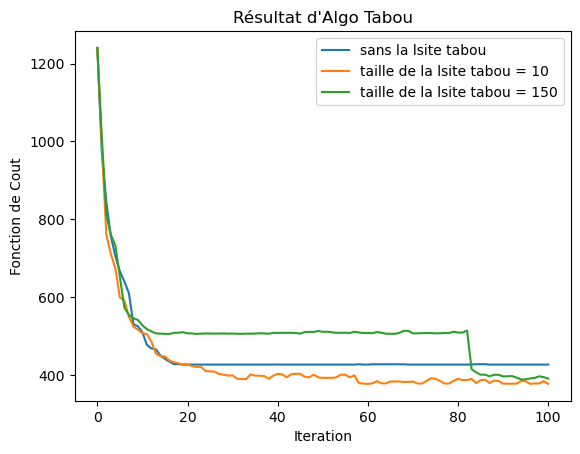

In [63]:
# Exemple d'utilisation


taille_tabou = 20
max_iterations = 100
taille_voisin = 70

list_client =  [i for i in range(nombre_client)]
random.shuffle(list_client)
list_client_initial = get_route_version2(list_client,time_window,Q)

meilleure_solution, meilleure_valeur , history_1 = tabou(list_client_initial,0, max_iterations,taille_voisin)
meilleure_solution, meilleure_valeur , history_2 = tabou(list_client_initial,10, max_iterations,taille_voisin)
meilleure_solution, meilleure_valeur , history_3 = tabou(list_client_initial,200, max_iterations,taille_voisin)
 


plt.plot(history_1,label = 'sans la lsite tabou ')
plt.plot(history_2, label = 'taille de la lsite tabou = 10')
plt.plot(history_3,label = 'taille de la lsite tabou = 150')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Fonction de Cout')
plt.title("Résultat d'Algo Tabou")
plt.savefig('Résultats/Algo_taille_liste_Tabou')